In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from methods import *

C:\Users\ndrs\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
raw_data=pd.read_excel('Book227.xlsx')
raw_data.reset_index(drop=True,inplace=True)
raw_data=raw_data[:-3]

raw_data.drop(['PATIENTS','Unnamed: 81'],axis=1,inplace=True)
raw_data.rename(columns={"BG Value": "BG VAL"},inplace=True)
#raw_data.head(3)
raw_data.tail(10)

,1,2,3,4,5,6,7,8,9,10,...,72,73,74,75,76,77,78,79,80,BG VAL
218,378.0,374.0,372.0,361.0,363.0,361.0,355.0,357.0,357.0,356.0,...,314.0,311.0,305.0,303.0,306.0,305.0,302.0,302.0,302.0,80.0
219,626.0,597.0,602.0,605.0,603.0,594.0,590.0,590.0,569.0,570.0,...,521.0,537.0,533.0,522.0,508.0,520.0,532.0,531.0,514.0,294.0
220,138.0,137.0,136.0,137.0,139.0,138.0,140.0,138.0,136.0,137.0,...,158.0,156.0,160.0,161.0,156.0,160.0,165.0,163.0,163.0,122.0
221,763.0,771.0,751.0,753.0,748.0,730.0,740.0,739.0,686.0,612.0,...,612.0,591.0,599.0,598.0,606.0,594.0,598.0,601.0,596.0,117.0
222,896.0,890.0,908.0,893.0,894.0,889.0,897.0,896.0,890.0,888.0,...,878.0,879.0,869.0,870.0,864.0,873.0,864.0,875.0,880.0,134.0
223,735.0,731.0,736.0,740.0,737.0,738.0,735.0,734.0,731.0,731.0,...,693.0,694.0,691.0,691.0,688.0,685.0,687.0,688.0,688.0,88.0
224,541.0,539.0,543.0,548.0,545.0,545.0,542.0,531.0,547.0,542.0,...,534.0,529.0,534.0,525.0,540.0,527.0,535.0,544.0,533.0,177.0
225,153.0,161.0,161.0,165.0,161.0,160.0,160.0,161.0,160.0,160.0,...,154.0,154.0,154.0,154.0,159.0,157.0,159.0,155.0,157.0,110.0
226,289.0,286.0,289.0,287.0,283.0,283.0,291.0,289.0,286.0,278.0,...,229.0,240.0,236.0,231.0,239.0,219.0,232.0,234.0,228.0,117.0
227,282.0,281.0,281.0,281.0,281.0,280.0,281.0,281.0,280.0,279.0,...,266.0,264.0,265.0,265.0,264.0,262.0,266.0,267.0,265.0,124.0


In [3]:
X,y=raw_data.drop(['BG VAL'],axis=1),raw_data['BG VAL']
random_state=42

In [4]:
summary_data=gen_summary_data(X)
summary_data.drop(['min','mode','max-min','Q1','Q3','median','max'],axis=1,inplace=True)
summary_data.head(3)

,avg,std
0,475.4000,53.725415
1,257.4250,99.743440
2,609.1375,62.314381


In [5]:
x_train,x_test,y_train,y_test=train_test_split(summary_data,y,test_size=0.1,random_state=random_state)

**Model name:  LinearRegression
[176.73031098 158.91624515 160.77627369 151.47611191 182.03876282
 158.89860259 161.80589653 153.95734996 158.07863684 158.84890308
 176.61556371 157.33690597 163.64276386 155.73441629 167.97898621
 158.21592601 149.61043114 164.48732586 167.80132902 164.28322863
 163.18923951 147.12639778 171.06342652]
 ERROR MEASURES 
Root Mean Squared Error:  83.72476152580096
Mean Absolute Error:  66.29039964909154
Mean Absolute Percent Error:  40.67240580770355
R2 score:  -95.52142484033911


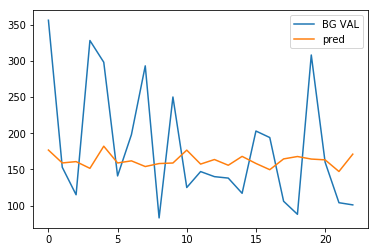

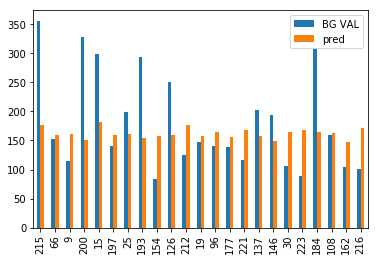

,BG VAL,pred
215,356.0,176.730311
66,153.0,158.916245
9,115.0,160.776274
200,328.0,151.476112
15,298.0,182.038763
197,141.0,158.898603
25,198.0,161.805897
193,293.0,153.957350
154,83.0,158.078637
126,250.0,158.848903


**Model name:  RandomForestRegressor
[113.  181.  160.7 176.1 195.1 180.  135.7 148.  163.7 192.1 153.9 164.5
 166.8 151.2 179.4 149.2 165.1 147.6 165.5 140.8 169.5 180.1 128.2]
 ERROR MEASURES 
Root Mean Squared Error:  89.40552458370207
Mean Absolute Error:  69.0
Mean Absolute Percent Error:  45.5799056399581
R2 score:  -19.3225955596431


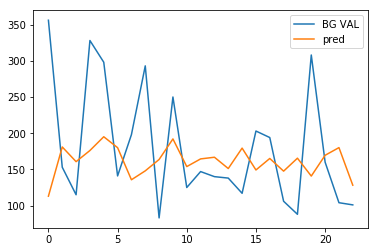

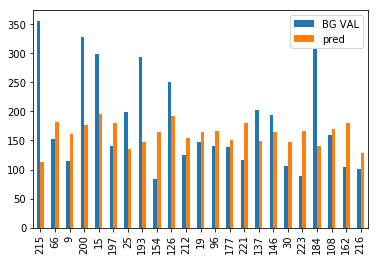

,BG VAL,pred
215,356.0,113.0
66,153.0,181.0
9,115.0,160.7
200,328.0,176.1
15,298.0,195.1
197,141.0,180.0
25,198.0,135.7
193,293.0,148.0
154,83.0,163.7
126,250.0,192.1


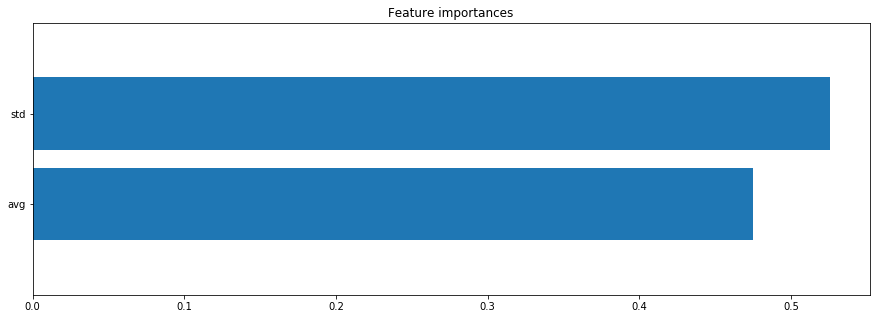

**Model name:  DecisionTreeRegressor
[100. 184. 135. 109. 286. 289. 158. 116.  99. 184. 129. 159. 245. 182.
 194. 110. 103. 141. 161. 106. 162. 126. 194.]
 ERROR MEASURES 
Root Mean Squared Error:  107.72791814486199
Mean Absolute Error:  79.91304347826087
Mean Absolute Percent Error:  60.50220752574265
R2 score:  -2.964783775091479


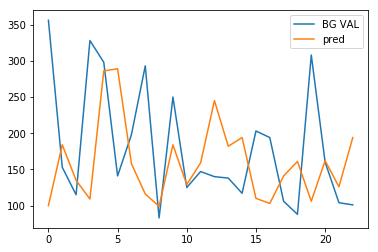

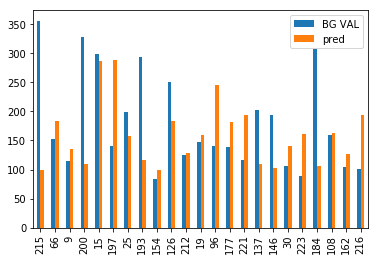

,BG VAL,pred
215,356.0,100.0
66,153.0,184.0
9,115.0,135.0
200,328.0,109.0
15,298.0,286.0
197,141.0,289.0
25,198.0,158.0
193,293.0,116.0
154,83.0,99.0
126,250.0,184.0


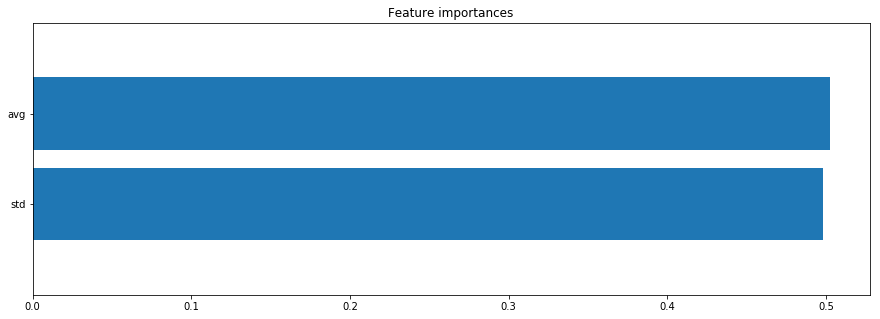

**Model name:  GradientBoostingRegressor
[111.57286482 173.50703043 141.00744191 114.88018252 211.04578402
 174.22611445 137.11509006 134.17197268 149.54070887 173.50703043
 146.44103863 153.09458399 161.95750761 139.23695898 159.53273562
 165.06967355 123.41344948 157.86329046 146.82782245 148.73673085
 184.28220737 236.16587991 147.79901507]
 ERROR MEASURES 
Root Mean Squared Error:  96.70942491348175
Mean Absolute Error:  72.25954597100642
Mean Absolute Percent Error:  50.74743321090526
R2 score:  -11.12171533587302


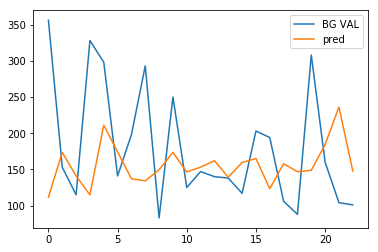

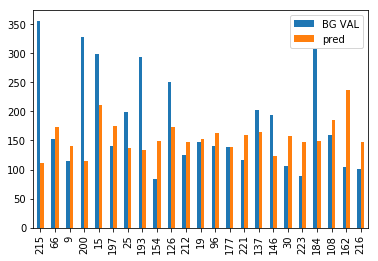

,BG VAL,pred
215,356.0,111.572865
66,153.0,173.507030
9,115.0,141.007442
200,328.0,114.880183
15,298.0,211.045784
197,141.0,174.226114
25,198.0,137.115090
193,293.0,134.171973
154,83.0,149.540709
126,250.0,173.507030


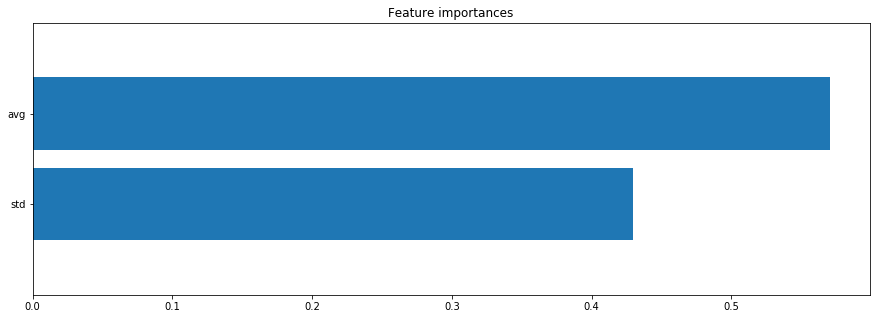

**Model name:  KNeighborsRegressor
[116.4 168.2 140.8 195.  240.8 115.6 137.4 153.2 186.  184.8 134.6 149.2
 183.6 153.2 165.  174.  192.6 176.8 157.2 146.6 156.6 148.  157.2]
 ERROR MEASURES 
Root Mean Squared Error:  84.5243674667381
Mean Absolute Error:  61.68695652173914
Mean Absolute Percent Error:  40.16186276190078
R2 score:  -8.626008199259946


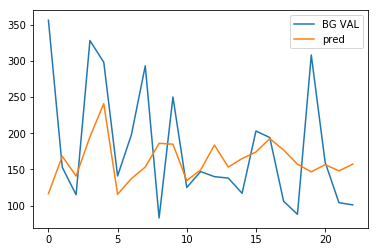

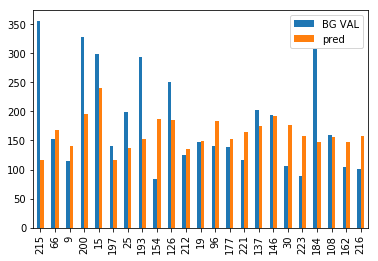

,BG VAL,pred
215,356.0,116.4
66,153.0,168.2
9,115.0,140.8
200,328.0,195.0
15,298.0,240.8
197,141.0,115.6
25,198.0,137.4
193,293.0,153.2
154,83.0,186.0
126,250.0,184.8


**Model name:  AdaBoostRegressor
[161.68944099 172.26086957 157.89873418 173.61702128 196.96875
 171.97619048 157.89873418 171.97619048 161.68944099 172.26086957
 175.02597403 161.68944099 172.26086957 161.68944099 161.68944099
 161.68944099 171.97619048 171.97619048 172.26086957 171.97619048
 175.02597403 182.88333333 161.68944099]
 ERROR MEASURES 
Root Mean Squared Error:  81.30858477345396
Mean Absolute Error:  66.52014703236073
Mean Absolute Percent Error:  39.08620615018133
R2 score:  -84.95915796106371


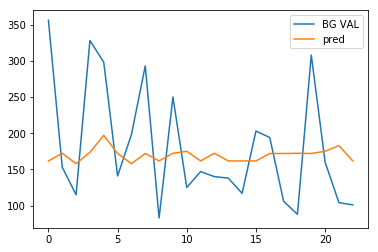

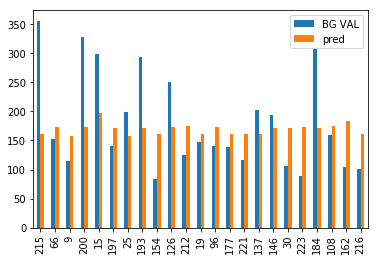

,BG VAL,pred
215,356.0,161.689441
66,153.0,172.260870
9,115.0,157.898734
200,328.0,173.617021
15,298.0,196.968750
197,141.0,171.976190
25,198.0,157.898734
193,293.0,171.976190
154,83.0,161.689441
126,250.0,172.260870


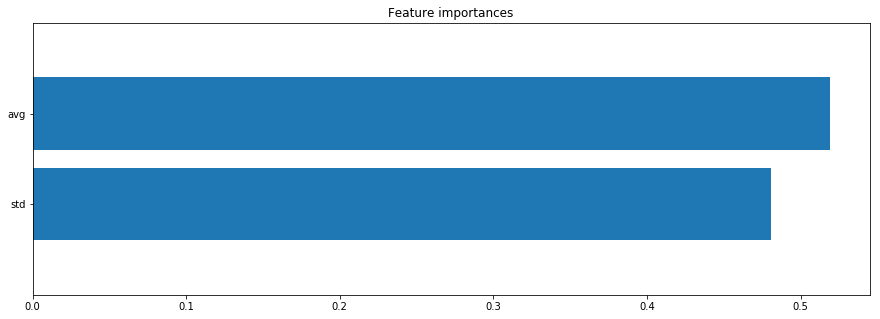

**Model name:  MLPRegressor
[275.81481799 146.68645303 137.59005899  67.26612752 207.65112126
  91.81525537 144.28137084  93.57089326 133.31768313 145.18014406
 287.64155005 124.52604694 186.195215    99.30144449 194.99732143
 135.59458545  63.69406301 168.71106551 219.15711492 130.25595246
 179.3140072   56.9426074  226.81193633]
 ERROR MEASURES 
Root Mean Squared Error:  108.5598013045746
Mean Absolute Error:  88.13717693292371
Mean Absolute Percent Error:  74.33969994873301
R2 score:  -2.1166073653401978


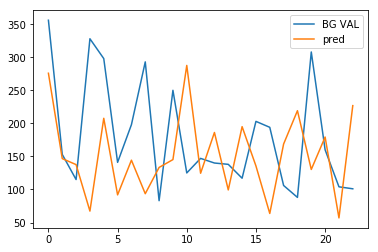

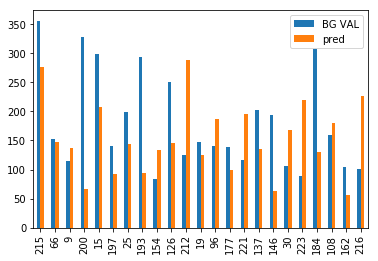

,BG VAL,pred
215,356.0,275.814818
66,153.0,146.686453
9,115.0,137.590059
200,328.0,67.266128
15,298.0,207.651121
197,141.0,91.815255
25,198.0,144.281371
193,293.0,93.570893
154,83.0,133.317683
126,250.0,145.180144


array([0.51896723, 0.48103277])

In [6]:
clf_models=[LinearRegression(),
            RandomForestRegressor(random_state=random_state),
            DecisionTreeRegressor(random_state=random_state),
            GradientBoostingRegressor(random_state=random_state),
            KNeighborsRegressor(),
            AdaBoostRegressor(random_state=random_state),
            MLPRegressor()
    ]   
get_model_prediction(x_train,y_train,x_test,y_test,clf_models,True,True)

## Linear Coefficient 

### Using 90% of data

 ERROR MEASURES 
Root Mean Squared Error:  83.72476152580096
Mean Absolute Error:  66.29039964909154
Mean Absolute Percent Error:  40.67240580770355
R2 score:  -95.52142484033911


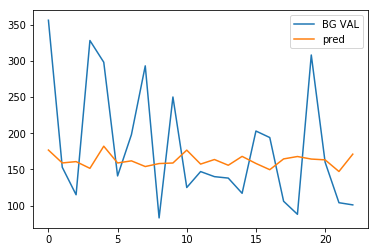

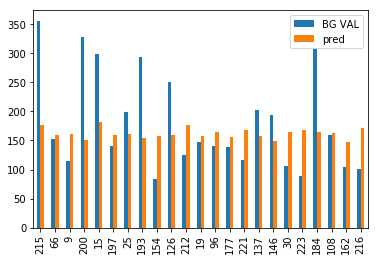

,BG VAL,pred
215,356.0,176.730311
66,153.0,158.916245
9,115.0,160.776274
200,328.0,151.476112
15,298.0,182.038763
197,141.0,158.898603
25,198.0,161.805897
193,293.0,153.957350
154,83.0,158.078637
126,250.0,158.848903


the intercept of the linear model is 139.3881465574886
The coefficient for avg is 0.03721982942972575
The coefficient for std is 0.1205561146675591


In [9]:
model = LinearRegression()
model.fit(x_train, y_train)
pred=model.predict(x_test)
clf_metrics=acc_score(y_test,pred)
plot_test_data(y_test,pred)
intercept = model.intercept_
print('the intercept of the linear model is',intercept)
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

### Using all the data

In [18]:
model = LinearRegression()
model.fit(summary_data, y)
#pred=model.predict(x_test)
#clf_metrics=acc_score(y_test,pred)
#plot_test_data(y_test,pred)
intercept = model.intercept_
print('the intercept of the linear model is',intercept)
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

the intercept of the linear model is 144.8383799622302
The coefficient for avg is 0.02685207778281211
The coefficient for std is 0.15076222862290908


## load test data

In [ ]:
new_data=pd.read_excel('STANDARDS-WEARABLE-NATRAJ PREDICTION.xlsx',sheet_name='PREDICTION-DETAILS',header=None,
                      usecols="G", na_values=['Orig ADC']).dropna().T
y_test=new_data[0]
x_test=new_data.drop([0],axis=1)
test_data=gen_summary_data(x_test)
test_data.head(3)

In [ ]:
clf_models=[LinearRegression(),
            RandomForestRegressor(random_state=random_state),
            GradientBoostingRegressor(random_state=random_state),
            SGDRegressor(random_state=random_state),
            KNeighborsRegressor(),
            AdaBoostRegressor(random_state=random_state),
            MLPRegressor()
    ]
get_model_prediction(summary_data,y,test_data,None,clf_models)
print('Actual Glucose Level',y_test)